<a href="https://colab.research.google.com/github/MoonShineToSpace/Colab/blob/main/FirstColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensors store the network state. These are also known as Tensor variables.
Traninig a neural network revolves around these concepts.
Steps to Tensor Flow.

Low leve Tensor manipulations.
1. Tensor variables store the neural network state
2. Tensor Operations suchs as relu, matmul, addition etc.
3. Back Propagation a way to compute the gradient of the math expressions.

Second, high level deep learning concepts. This translates to Keras API.
1. Layers which are combined into a model
2. A loss function which defines the feedbak signal used for learning
3. An optimizer - how learning process proceeds.
4. Metrics to evaluate model performance such as accuracy
5. A traninig loop : that Performs mini batch stochastic gradient descent.




Tensor constants

In [ ]:
import tensorflow as tf
x=tf.ones(shape=(2,2))
print(x)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [ ]:
x= tf.random.normal(shape=(3,1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 1.3733715 ]
 [ 0.19035259]
 [-0.03168188]], shape=(3, 1), dtype=float32)


Variables

In [ ]:
v=tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
#print(v)
v.assign(tf.ones(shape=(3,1)))
#print(v)
v[0,0].assign(3.)
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


Eager execution..  get executed when we issue print statement.

In [ ]:
a=tf.ones((2,2))
b=tf.square(a)
c=tf.sqrt(a)
d=b+c
e=tf.matmul(a,b)
e*=d



Gradient computation...

In [ ]:
input_var =  tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result =tf.square(input_var)
gradient = tape.gradient(result, input_var)



In [ ]:
input_const =  tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result =tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [ ]:
time =  tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position =4.9*time**2
  speed = inner_tape.gradient(position,time)
acceleration=outer_tape.gradient(speed,time)



In [ ]:
import numpy as np
num_samples_per_class=1000
negative_samples=np.random.multivariate_normal(mean=[0,3],cov=[[1,.5],[.5,1]],size=num_samples_per_class)
print(negative_samples.shape)
positive_samples=np.random.multivariate_normal(mean=[3,0],cov=[[1,.5],[.5,1]],size=num_samples_per_class)
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)
targets=np.vstack((np.zeros((num_samples_per_class,1),dtype='float32'),np.ones((num_samples_per_class,1),dtype='float32')))
#print(inputs)
print(targets.shape)


(1000, 2)
(2000, 1)


ValueError: ignored

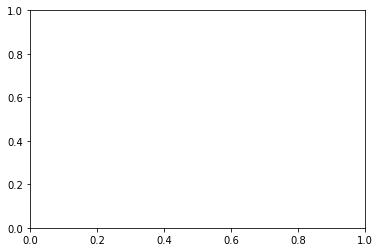

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
#plt.scatter(inputs[:,0],inputs[:,1])
plt.show()

# New Section

In [ ]:
input_dim=2
output_dim=1
W=tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b=tf.Variable(initial_value=tf.zeros(output_dim,))

In [ ]:
def model(inputs):
  return tf.matmul(inputs,W)+b


In [ ]:
def square_Loss(targets,predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

Training Step:

In [ ]:
learning_rate =0.1
def training_step(inputs,targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_Loss(targets,predictions)
  grad_loss_wrt_w,grad_loss_wrt_b = tape.gradient(loss,[W,b])
  W.assign_sub(grad_loss_wrt_w*learning_rate)
  b.assign_sub(grad_loss_wrt_b*learning_rate)
  return loss


Batch Training Loop

In [ ]:
for step in range(40):
  loss=training_step(inputs,targets)
print(f'loss at step {step}: {loss:.4f}')

loss at step 39: 0.0292


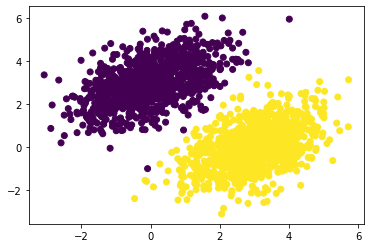

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>.5)
plt.show()

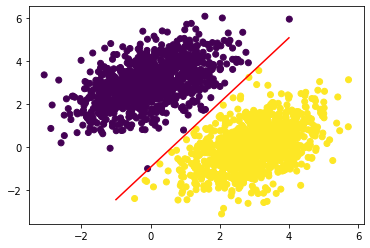

In [ ]:
x=np.linspace(-1,4,100)
y=(-W[0]/W[1]) *x+(.5-b)/W[1]
plt.plot(x,y,'-r')
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>.5)
plt.show()